In [2]:
#Functions for distance, x, y, and z
import math
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

def distance(x):
    if x < 0:
        return 0
    else:
        return 1/x

def x(R, b, l):
    return R * math.cos(b*(math.pi/180)) * math.cos(l*(math.pi/180))

def y(R, b, l):
    return R * math.cos(b*(math.pi/180)) * math.sin(l*(math.pi/180))

def z(R, b):
    return R * math.sin(b*(math.pi/180))

def absmag(m, d):
    return (((math.log10(d) * 5)*-1)+5)+m

def badToGood(bad, everything):
    return bad/everything

#https://pages.uoregon.edu/soper/Light/luminosity.html
def luminosity(m, d):
    return 4*math.pi*math.pow(d, 2)*m

def solar_lum(l):
    return l/(3.828*math.pow(10, 26))

#σ = 5.670374419...×10−8 W⋅m−2⋅K−4
def radius(l, t):
    const = 5.67 * math.pow(10, -8)
    ans = l/(4*math.pi*const*math.pow(t, 4))
    return math.log10(math.sqrt(ans))


In [13]:
import math
import csv
import random
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.cluster import DBSCAN
from sklearn import metrics
import numpy as np

In [4]:
# Christmas Tree Cluster

#SELECT * from gaiadr2.gaia_source where 
#RA between 95 and 105 AND
#DEC between 5 and 15 AND
#parallax > 1.15 AND parallax < 1.35

christmas = pd.read_csv("christmastree.csv", low_memory=False)
christmas.loc[:, 'parallax_arcsec'] = christmas['parallax'].apply(lambda x: x*.001)
christmas.loc[:, 'R'] = christmas['parallax_arcsec'].apply(distance)
christmas.loc[:, 'x'] = christmas.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
christmas.loc[:, 'y'] = christmas.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
christmas.loc[:, 'z'] = christmas.apply(lambda r: z(r['R'], r['b']), axis=1)
christmas.loc[:, 'magnitude'] = christmas.apply(lambda x: absmag(x['phot_g_mean_mag'], x['R']), axis=1)
christmas.loc[:, 'luminosity'] = christmas.apply(lambda x: luminosity(x['phot_g_mean_mag'], x['R']), axis=1)
christmas.loc[:, 'solar_luminosity'] = christmas.apply(lambda x: solar_lum(x['luminosity']), axis=1)
christmas.loc[:, 'radius'] = christmas.apply(lambda x: radius(x['luminosity'], x['teff_val']), axis=1)

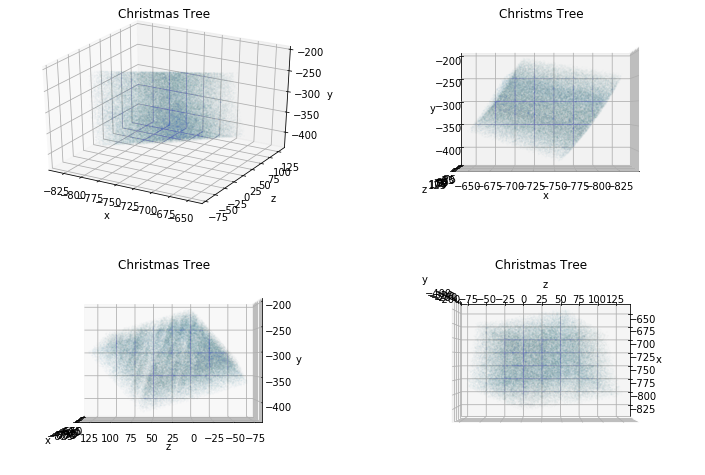

In [6]:
df = christmas

fig = plt.figure()
ax = fig.add_subplot(221, projection ='3d')
ax.scatter(df['x'], df['z'], df['y'], s=0.0001)
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('y')
ax.set_title('Christmas Tree')

ax1 = fig.add_subplot(222, projection ='3d')
ax1.scatter(df['x'], df['z'], df['y'], s=0.0001)
ax1.set_xlabel('x')
ax1.set_ylabel('z')
ax1.set_zlabel('y')
ax1.set_title('Christms Tree')
ax1.view_init(0, 90)

ax2 = fig.add_subplot(223, projection ='3d')
ax2.scatter(df['x'], df['z'], df['y'], s=0.0001)
ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_zlabel('y')
ax2.set_title('Christmas Tree')
ax2.view_init(0, 180)

ax3 = fig.add_subplot(224, projection ='3d')
ax3.scatter(df['x'], df['z'], df['y'], s=0.0001)
ax3.set_xlabel('x')
ax3.set_ylabel('z')
ax3.set_zlabel('y')
ax3.set_title('Christmas Tree')
ax3.view_init(-90, 0)

plt.subplots_adjust(0.4, 0.4, 2, 2)
plt.show()

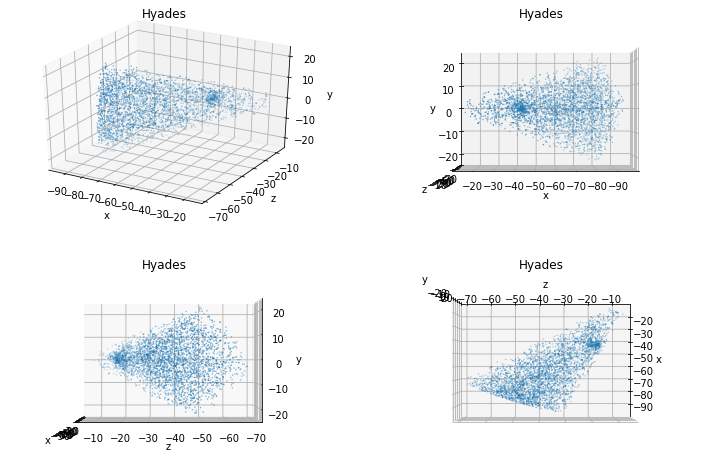

In [11]:
# Hyades Cluster

#SELECT * from gaiadr2.gaia_source where 
#RA between 50 and 70 AND
#DEC between 0 and 20 AND
#parallax > 10 AND parallax < 50

hyades = pd.read_csv("hyades3.csv", low_memory=False)
hyades.loc[:, 'parallax_arcsec'] = hyades['parallax'].apply(lambda x: x*.001)
hyades.loc[:, 'R'] = hyades['parallax_arcsec'].apply(distance)
hyades.loc[:, 'x'] = hyades.apply(lambda r: x(r['R'], r['b'], r['l']), axis=1)
hyades.loc[:, 'y'] = hyades.apply(lambda r: y(r['R'], r['b'], r['l']), axis=1)
hyades.loc[:, 'z'] = hyades.apply(lambda r: z(r['R'], r['b']), axis=1)
hyades.loc[:, 'magnitude'] = hyades.apply(lambda x: absmag(x['phot_g_mean_mag'], x['R']), axis=1)
hyades.loc[:, 'luminosity'] = hyades.apply(lambda x: luminosity(x['phot_g_mean_mag'], x['R']), axis=1)
hyades.loc[:, 'solar_luminosity'] = hyades.apply(lambda x: solar_lum(x['luminosity']), axis=1)
hyades.loc[:, 'radius'] = hyades.apply(lambda x: radius(x['luminosity'], x['teff_val']), axis=1)

df = hyades

fig = plt.figure()
ax = fig.add_subplot(221, projection ='3d')
ax.scatter(df['x'], df['z'], df['y'], s=0.1)
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('y')
ax.set_title('Hyades')

ax1 = fig.add_subplot(222, projection ='3d')
ax1.scatter(df['x'], df['z'], df['y'], s=0.1)
ax1.set_xlabel('x')
ax1.set_ylabel('z')
ax1.set_zlabel('y')
ax1.set_title('Hyades')
ax1.view_init(0, 90)

ax2 = fig.add_subplot(223, projection ='3d')
ax2.scatter(df['x'], df['z'], df['y'], s=0.1)
ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_zlabel('y')
ax2.set_title('Hyades')
ax2.view_init(0, 180)

ax3 = fig.add_subplot(224, projection ='3d')
ax3.scatter(df['x'], df['z'], df['y'], s=0.1)
ax3.set_xlabel('x')
ax3.set_ylabel('z')
ax3.set_zlabel('y')
ax3.set_title('Hyades')
ax3.view_init(-90, 0)

plt.subplots_adjust(0.4, 0.4, 2, 2)
plt.show()

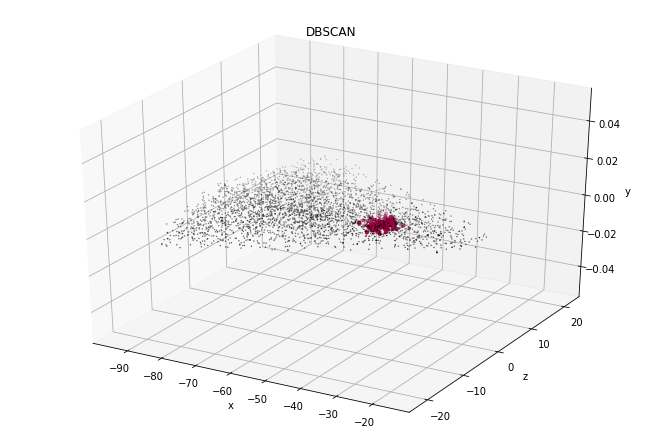

In [18]:
df = hyades[['x', 'y', 'z', 'pmra', 'pmdec']]
X = df.to_numpy()

db = DBSCAN(eps=10, min_samples=50).fit(X) #HERE
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

data = np.asarray(labels)
label = pd.DataFrame({'labels': data})
label.head(10)

data = np.asarray(core_samples_mask)
core = pd.DataFrame({'core_samples_mask': data})

df.reset_index(drop=True, inplace=True)
label.reset_index(drop=True, inplace=True)
core.reset_index(drop=True, inplace=True)

frames = [df, core, label]
df_all = pd.concat(frames, sort=False, axis=1)

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
# Black removed and is used for noise instead.
unique_labels = set(labels) #-1, 0, 1

#gives different colors to the different clusters, and black is for anamolies
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

fig = plt.figure()
axp = fig.add_subplot(111, projection ='3d')

#for each unique label, plot it with the color that corresponds to it
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    axp.scatter(xy[:, 0], xy[:, 1], facecolor=tuple(col), s=10)

    xy = X[class_member_mask & ~core_samples_mask]
    axp.scatter(xy[:, 0], xy[:, 1], facecolor=tuple(col),
             edgecolor='k', s=0.1)

axp.set_xlabel('x')
axp.set_ylabel('z')
axp.set_zlabel('y')
axp.set_title('DBSCAN')
plt.subplots_adjust(.5, .5, 2, 2)
plt.show()

In [ ]:
# thoughts for this week:
# take it away from jupyter notebooks and make it an actual tool

# input - csvfile, cluster name your looking for (default to none if just testing random data set), 
# how many stars at a minimum the cluster should have

# Data Mining
# output: HR diagrams, 1 originial and 1 after trimming the data based on parallax error, visibility periods, excessnoise, etc.

# DBSCAN
# output: graph with clusters shown
# data on graph compared to data in HR diagram, what is correctly clustered 
# - only possibly with one cluster? - test with Pleades and Beehive
